# Regresión lineal simple con Statsmodel

In [20]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("Advertising.csv")

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
import statsmodels.formula.api as smf 

In [5]:
lm=smf.ols(formula="Sales~TV",data=data).fit()

In [6]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [7]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [8]:
lm.rsquared

0.611875050850071

In [9]:
lm.rsquared_adj

0.6099148238341623

In [11]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 20 Jun 2018   Prob (F-statistic):           1.47e-42
Time:                        14:03:37   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
sales_pred=lm.predict(pd.DataFrame(data["TV"]))
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
5       7.446162
6       9.765950
7      12.746498
8       7.441409
9      16.530414
10     10.174765
11     17.238710
12      8.163966
13     11.667416
14     16.734822
15     16.321253
16     10.255578
17     20.409404
18     10.322129
19     14.034741
20     17.414596
21     18.317792
22      7.660077
23     17.885209
24      9.994126
25     19.529976
26     13.825579
27     18.446141
28     18.859710
29     10.388680
         ...    
170     9.409426
171    14.852371
172     7.964312
173    15.037764
174    17.604742
175    20.195489
176    18.840695
177    15.123330
178    20.185982
179    14.904661
180    14.476831
181    17.419349
182     9.704153
183    20.704131
184    19.097393
185    16.777605
186    13.663955
187    16.116846
188    20.628073
189     7.921529
190     8.910291
191    10.621610
192     7.850224
193    14.961705
194    14.148829
195     8.848493
196    11.510545
197    15.4465

In [13]:
import matplotlib.pyplot as plt

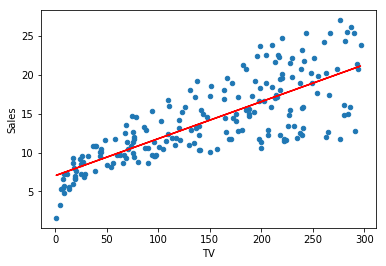

In [15]:
%matplotlib inline
data.plot(kind="scatter",x="TV",y="Sales")
plt.plot(pd.DataFrame(data["TV"]),sales_pred,c="red",linewidth=1.5)

In [16]:
data["Sales_pred"]=7.032594+ 0.047537*data["TV"]


In [18]:
data["RSE"]=(data["Sales"]-data["Sales_pred"])**2

In [19]:
SSD=sum(data["RSE"])
SSD

2102.5305838896525

In [21]:
RSE=np.sqrt(SSD/(len(data)-2))
RSE

3.258656369238098

In [22]:
sales_m=np.mean(data["Sales"])

In [23]:
sales_m

14.022500000000003

In [24]:
error=RSE/sales_m
error

0.2323876890168014

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <a list of 10 Patch objects>)

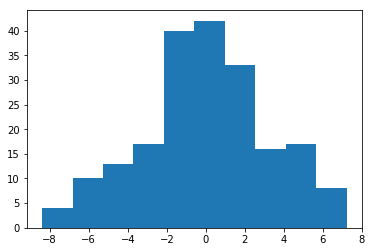

In [25]:
plt.hist(data["Sales"]-data["Sales_pred"])

# Regresión lineal multiple con statsmodel

In [27]:
#Añadir el newspaper al modelo lineal existente
lm2=smf.ols(formula="Sales~TV+Newspaper",data=data).fit()

In [28]:
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [29]:
lm2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

In [30]:
lm2.rsquared

0.6458354938293271

In [31]:
lm2.rsquared_adj

0.6422399150864777

In [32]:
sales_pred=lm2.predict(data[["TV","Newspaper"]])

In [33]:
sales_pred

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
5       9.499445
6       9.510924
7      11.925419
8       6.222518
9      16.083262
10      9.945228
11     16.021516
12      9.805257
13     10.666196
14     17.381579
15     17.278653
16     13.995865
17     21.440393
18      9.829727
19     13.528088
20     18.379490
21     17.948453
22      8.587327
23     17.641044
24      9.506109
25     18.967556
26     13.034296
27     18.048554
28     18.456595
29     10.890326
         ...    
170     8.933646
171    15.586198
172     7.445942
173    14.239121
174    16.785052
175    20.610266
176    18.322864
177    15.314058
178    19.800514
179    14.320051
180    13.486699
181    17.234475
182     9.724113
183    22.438692
184    19.005059
185    16.256398
186    13.493904
187    15.542563
188    19.352307
189     7.686735
190     7.884019
191     9.581306
192     7.978983
193    13.757260
194    13.061376
195     8.176802
196    10.551220
197    14.3594

In [34]:
SSD=sum((data["Sales"]-sales_pred)**2)
SSD

1918.5618118968273

In [35]:
RSE=np.sqrt(SSD/(len(data)-3))
RSE

3.120719860252885

In [36]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Wed, 20 Jun 2018   Prob (F-statistic):           3.95e-45
Time:                        17:44:58   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
#Añadir la radio al modelo lineal existente
lm3=smf.ols(formula="Sales~TV+Radio",data=data).fit()

In [38]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 20 Jun 2018   Prob (F-statistic):           4.83e-98
Time:                        17:49:41   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
sales_pred=lm2.predict(data[["TV","Radio"]])

In [40]:
SSD=sum((data["Sales"]-sales_pred)**2)

In [41]:
RSE=np.sqrt(SSD/(len(data)-3))

In [42]:
SSD

556.9139800676182

In [43]:
RSE

1.681360912508001

In [44]:
error=RSE/sales_m
error

0.11990450436855059

In [46]:
#Añadiremos los 3 elementos existentes
lm4=smf.ols(formula="Sales~TV+Radio+Newspaper",data=data).fit()

In [47]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 20 Jun 2018   Prob (F-statistic):           1.58e-96
Time:                        18:19:21   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
sales_pred=lm2.predict(data[["TV","Radio","Newspaper"]])

In [49]:
SSD=sum((data["Sales"]-sales_pred)**2)

In [50]:
RSE=np.sqrt(SSD/(len(data)-4))

In [51]:
SSD

556.9139800676182

In [52]:
RSE

1.6856446415208184

In [53]:
error=RSE/sales_m
error

0.12020999404676898

# Multicolinealidad
## Factor de inflación de la varianza
#### VIF =1 Las variables no están correlacionada
#### VIF<5 Las variables tienen una correlación moderada y se pueden quedar
#### VIF>5 Las variables están altamente correlacionadas y deben desaparecer del modelo

In [54]:
#Newspaper~TV+Radio   R^2 VIF=1/(1-R2)
lm_n=smf.ols(formula="Newspaper~TV+Radio",data=data).fit()
rsquared=lm_n.rsquared
VIF=1/(1-rsquared)
VIF

1.1451873787239286

In [56]:
#TV~Newspaper+Radio   R^2 VIF=1/(1-R2)
lm_t=smf.ols(formula="TV~Newspaper+Radio",data=data).fit()
rsquared=lm_t.rsquared
VIF=1/(1-rsquared)
VIF

1.0046107849396502

In [57]:
#Radio~Newspaper+TV   R^2 VIF=1/(1-R2)
lm_r=smf.ols(formula="Radio~Newspaper+TV",data=data).fit()
rsquared=lm_r.rsquared
VIF=1/(1-rsquared)
VIF

1.1449519171055353

In [59]:
lm3.summary()  #Este es el modelo que usaremos

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 20 Jun 2018   Prob (F-statistic):           1.58e-96
Time:                        18:48:00   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""